In [2]:
import pandas as pd
import gurobi_logtools as glt
from report_functions import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# samp_100_dyn_df = pd.read_csv("/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/sample_tests/2024_02_29medium_new_equip_100samples/dynamic_linear/ld_medium_instance_new_config_S4_results.csv")
# samp_50_dyn_df = pd.read_csv("/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/sample_tests/2024_02_29medium_new_equip_50samples/dynamic_linear/ld_medium_instance_new_config_S4_results.csv")
# samp_50_dyn_df.head(100)


# # def add_log_and_gap(df, log_file_location, file_name_stuff):
# #     df = read_csv_add_log( log_file_location, file_name_stuff, df)
# #     df = read_csv_add_gap(df, gapname="gap_dyn")
# #     return df

# # samp_100_dyn_df = add_log_and_gap(samp_100_dyn_df, 
# #                                   "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/sample_tests/2024_02_29medium_new_equip_50samples/dynamic_linear/", 
# #                                   "ld_medium_instance_new_config_S40")
# log_file_location_50 = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/sample_tests/2024_02_29medium_new_equip_50samples/dynamic_linear/"
# file_name_stuff_50 = "ld_medium_instance_new_config_S4"
# log_file_location_100 = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/sample_tests/2024_02_29medium_new_equip_100samples/dynamic_linear/"
# file_name_stuff_100 = "ld_medium_instance_new_config_S4"
# def add_log_and_gap(log_file_location, file_name_stuff, df):
#     df = read_csv_add_log( log_file_location, file_name_stuff, df)
#     df = read_csv_add_gap(df, gapname="gap_dyn")
#     return df
# samp_100_dyn_df = add_log_and_gap(log_file_location_100, file_name_stuff_100, samp_100_dyn_df)
# samp_50_dyn_df = add_log_and_gap(log_file_location_50, file_name_stuff_50, samp_50_dyn_df)
# samp_100_dyn_df.head(100)


## Processing MC results

In [4]:
#Reads all of the .log files in /Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_11mc_test_40samples. The log files are in folders
#with numbers for names
import os
import re

def get_log(log_file_location):
    #look for .log files in all folders in the log_file_location
    log_files = []
    for root, dirs, files in os.walk(log_file_location):
        for file in files:
            if file.endswith(".log"):
                log_files.append(os.path.join(root, file))
    return log_files

log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_11mc_test_40samples"
log_files = get_log(log_file_location)
print(len(log_files))

110


In [51]:

#Gets the row of the csv run file from the file path. 
def get_row_from_file_path(file_path, row_location = 8):
    #gets the row of the csv run file from the file path. 
    file_path = file_path.split("/")
    file_path = file_path[row_location]
    return file_path


def summarize_logs(log_files, csv_config_file):
    results = glt.parse(log_files)
    summary = results.summary(results)
    #Only keeps objVal, MIPGap, LogFilePath
    summary = summary[['ObjVal', 'MIPGap', 'LogFilePath']]
    summary['row'] = summary['LogFilePath'].apply(lambda x: int(get_row_from_file_path(x)))
    summary = summary.sort_values(by='row')
    summary.reset_index(drop=True, inplace=True)
    #groups the summary table by every 10 rows, takes the average and standard deviation of the ObjVal and MIPGap
    config_df = pd.read_csv(csv_config_file)
    #merges the summary table with the config file, using the index of the config file and the row of the summary table
    summary = pd.merge( config_df,summary, left_index=True, right_on='row')
    #Groups by the model yaml
    #summary = summary.groupby('model_yaml').agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
    # summary['group'] = summary.index // instance_repeat
    # summary = summary.groupby('group').agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
    #creates the name from the model_yaml column. It is the text before the .yaml and after the last backslash
    summary['instance_name'] = summary['model_yaml'].apply( lambda x: x.split("/")[-1].split(".")[0])
    return summary


summary_40_samples = summarize_logs(log_files, "../SALBP_benchmark/MM_instances/csv_config/no_tree.csv" )
summary_40_samples['no_samples'] = 40
#makes boxplots of the ObjVal and MIPGap, grouping by the instance name
summary_40_samples.boxplot(column=['ObjVal'], by='instance_name', grid=False, rot=90, fontsize=10, figsize=(20,10))
summary_40_samples.boxplot(column=['MIPGap'], by='instance_name', grid=False, rot=90, fontsize=10, figsize=(20,10))
summary_40_samples.head(100)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/letshopethisworks2/opt/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/letshopethisworks2/opt/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

,model_yaml,equipment_yaml,scenario_tree_yaml,config_yaml,ObjVal,MIPGap,LogFilePath,row,instance_name,no_samples
0,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,4972.0,0.000000,/Users/letshopethisworks2/Documents/Phd Paper ...,0,n=20_10_n=20_11_n=20_12_n=20_13_n=20_14,10
1,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,4972.0,0.000000,/Users/letshopethisworks2/Documents/Phd Paper ...,1,n=20_10_n=20_11_n=20_12_n=20_13_n=20_14,10
2,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,4972.0,0.000000,/Users/letshopethisworks2/Documents/Phd Paper ...,2,n=20_10_n=20_11_n=20_12_n=20_13_n=20_14,10
3,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,4972.0,0.000000,/Users/letshopethisworks2/Documents/Phd Paper ...,3,n=20_10_n=20_11_n=20_12_n=20_13_n=20_14,10
4,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,4972.0,0.000000,/Users/letshopethisworks2/Documents/Phd Paper ...,4,n=20_10_n=20_11_n=20_12_n=20_13_n=20_14,10
...,...,...,...,...,...,...,...,...,...,...
95,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,12869.0,0.130702,/Users/letshopethisworks2/Documents/Phd Paper ...,95,n=20_19_n=20_20_n=20_21_n=20_22_n=20_23,10
96,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,12846.0,0.130858,/Users/letshopethisworks2/Documents/Phd Paper ...,96,n=20_19_n=20_20_n=20_21_n=20_22_n=20_23,10
97,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,12437.0,0.154217,/Users/letshopethisworks2/Documents/Phd Paper ...,97,n=20_19_n=20_20_n=20_21_n=20_22_n=20_23,10
98,SALBP_benchmark/MM_instances/model_data/small_...,SALBP_benchmark/MM_instances/equipment_data/ra...,No Tree,SALBP_benchmark/MM_instances/small_instance_lo...,12818.0,0.195896,/Users/letshopethisworks2/Documents/Phd Paper ...,98,n=20_19_n=20_20_n=20_21_n=20_22_n=20_23,10


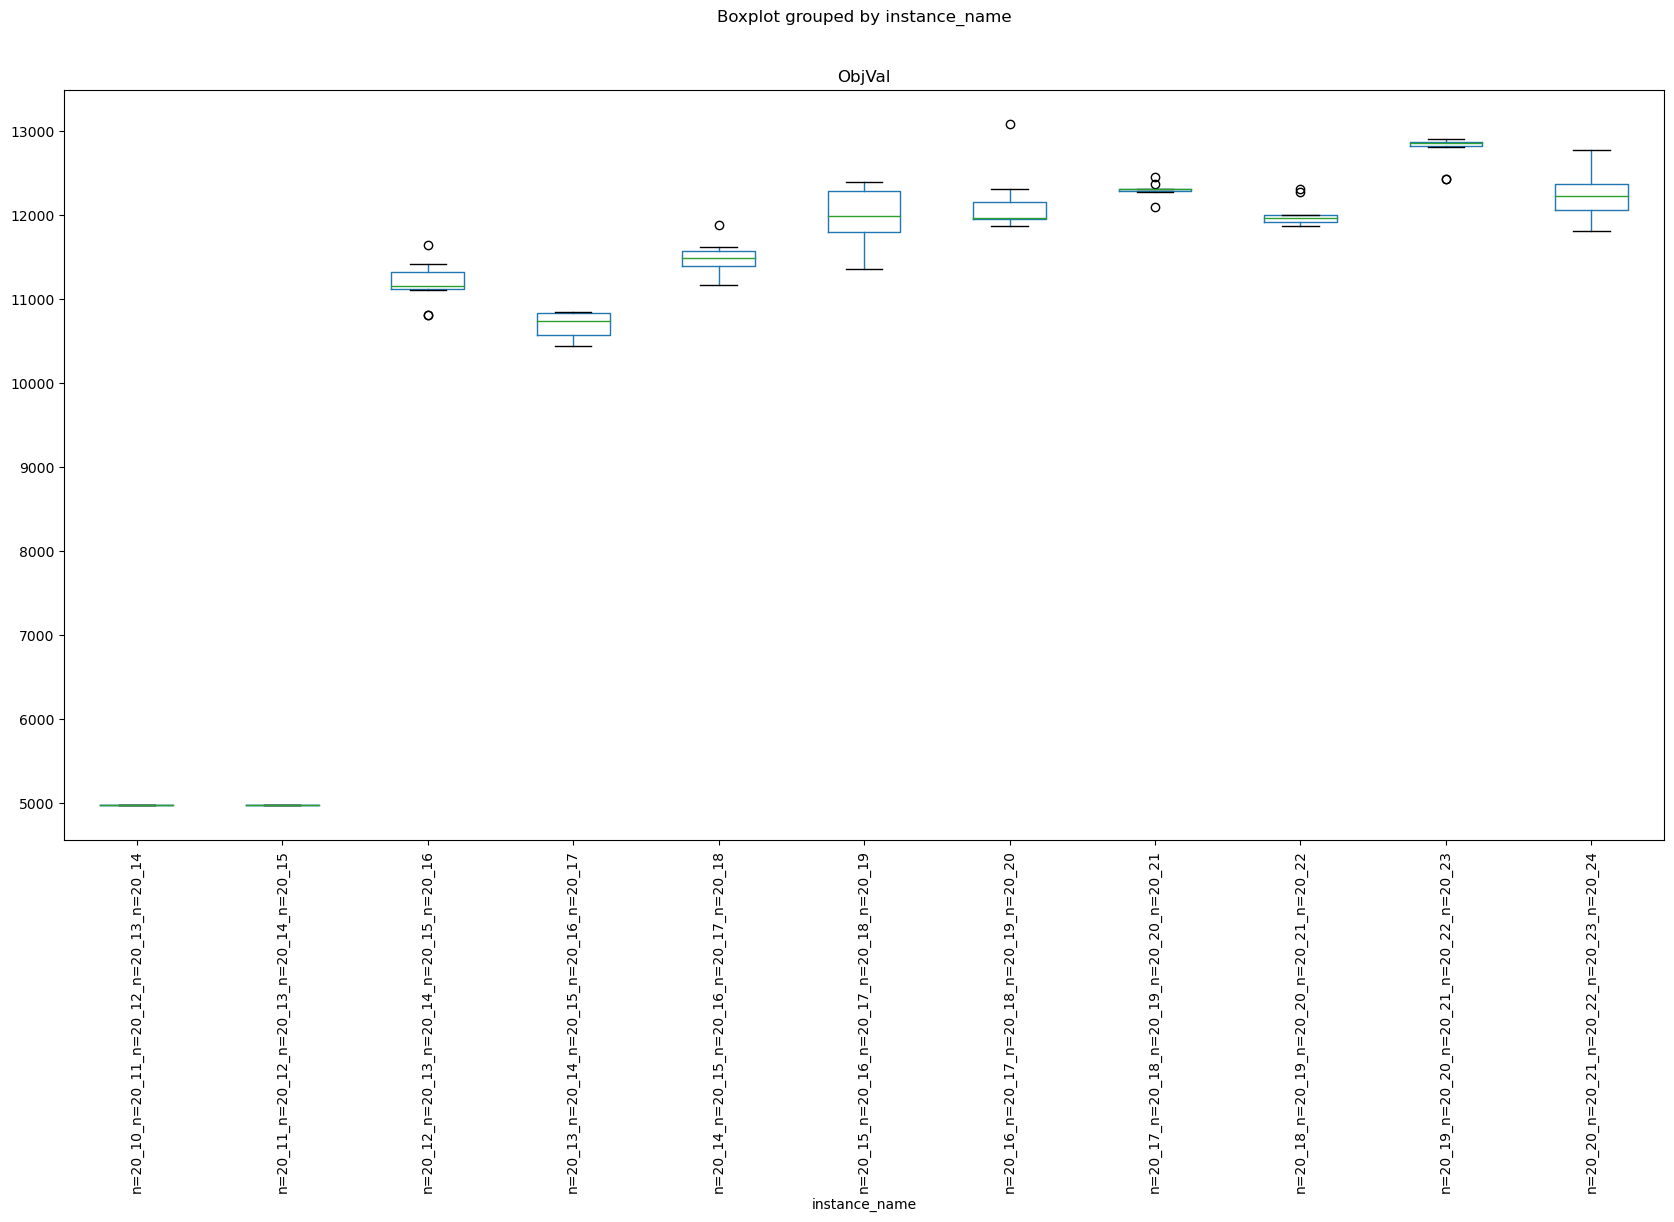

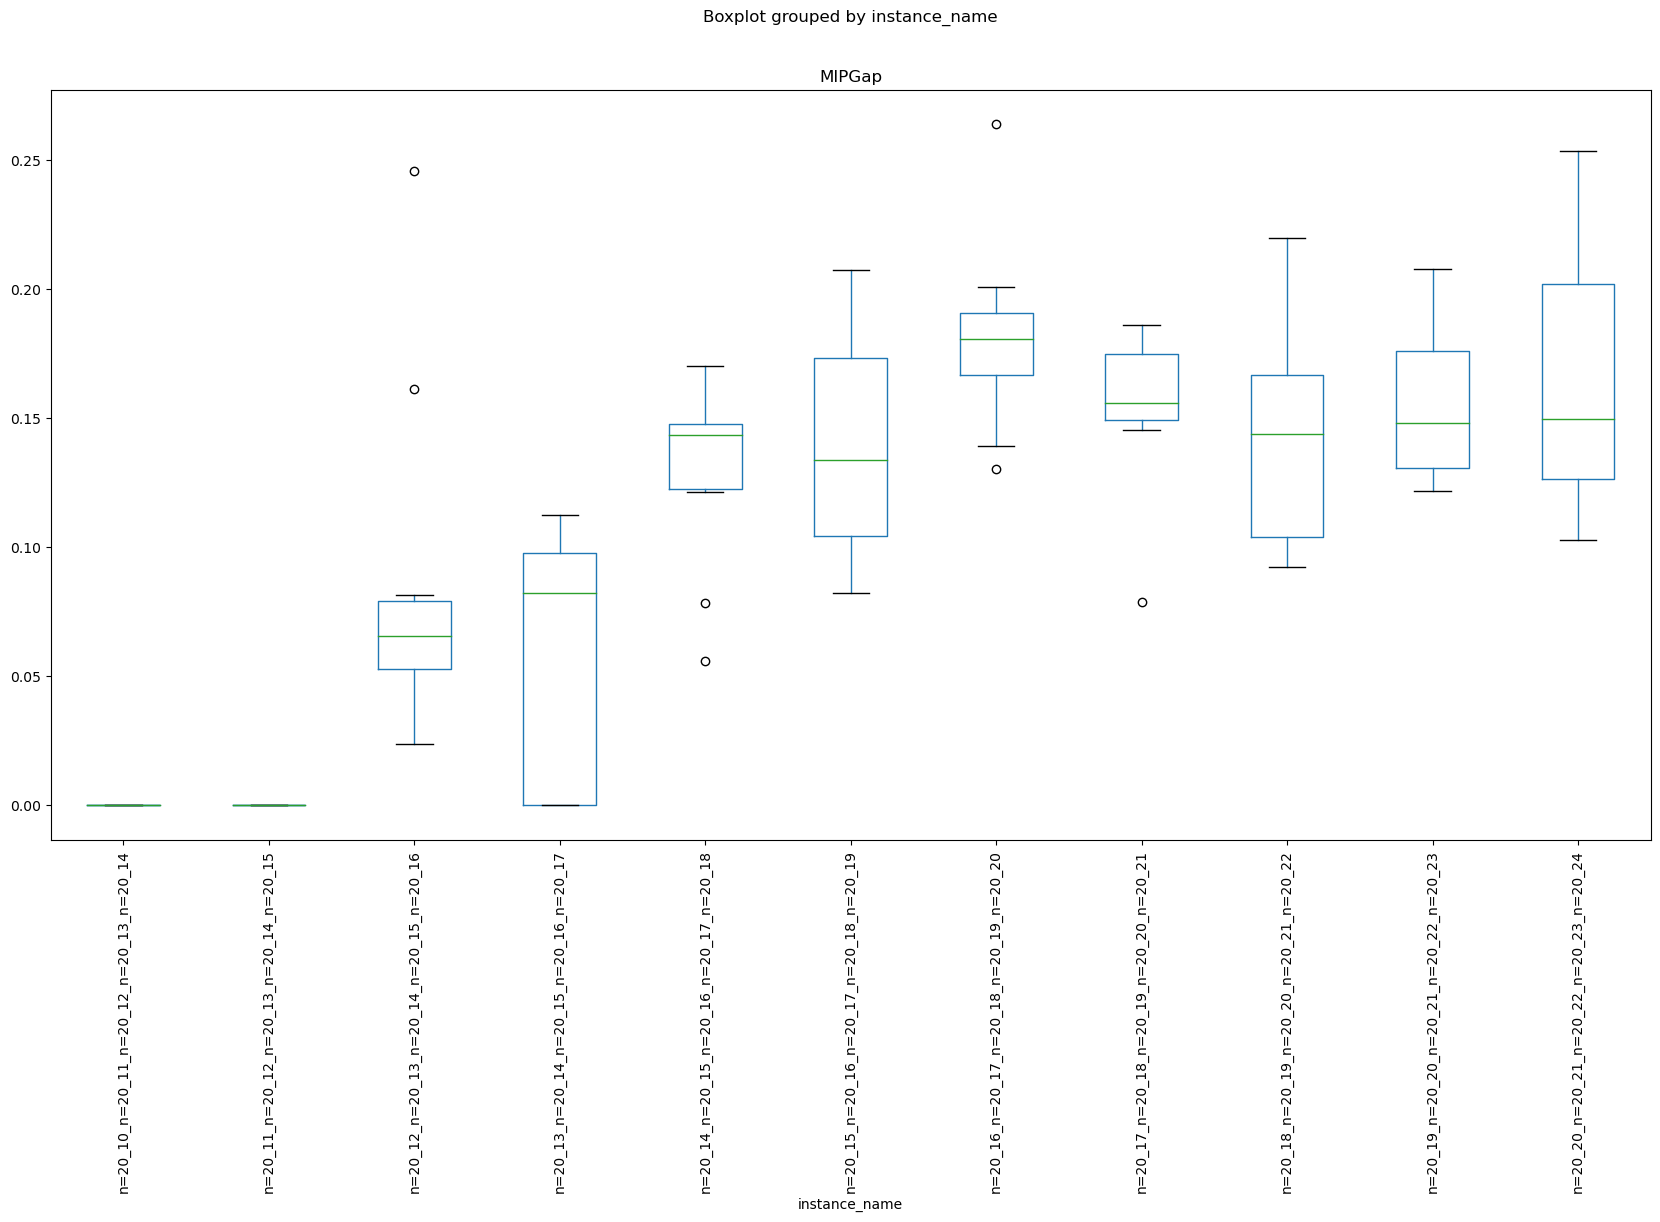

In [6]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_12mc_test_10samples"
log_files = get_log(log_file_location)
summary_10_samples = summarize_logs(log_files, "../SALBP_benchmark/MM_instances/csv_config/no_tree.csv" )
summary_10_samples['no_samples'] = 10
#makes boxplots of the ObjVal and MIPGap, grouping by the instance name
summary_10_samples.boxplot(column=['ObjVal'], by='instance_name', grid=False, rot=90, fontsize=10, figsize=(20,10))
summary_10_samples.boxplot(column=['MIPGap'], by='instance_name', grid=False, rot=90, fontsize=10, figsize=(20,10))
summary_10_samples.head(100)



<AxesSubplot:title={'center':'ObjVal'}, xlabel='instance_name'>

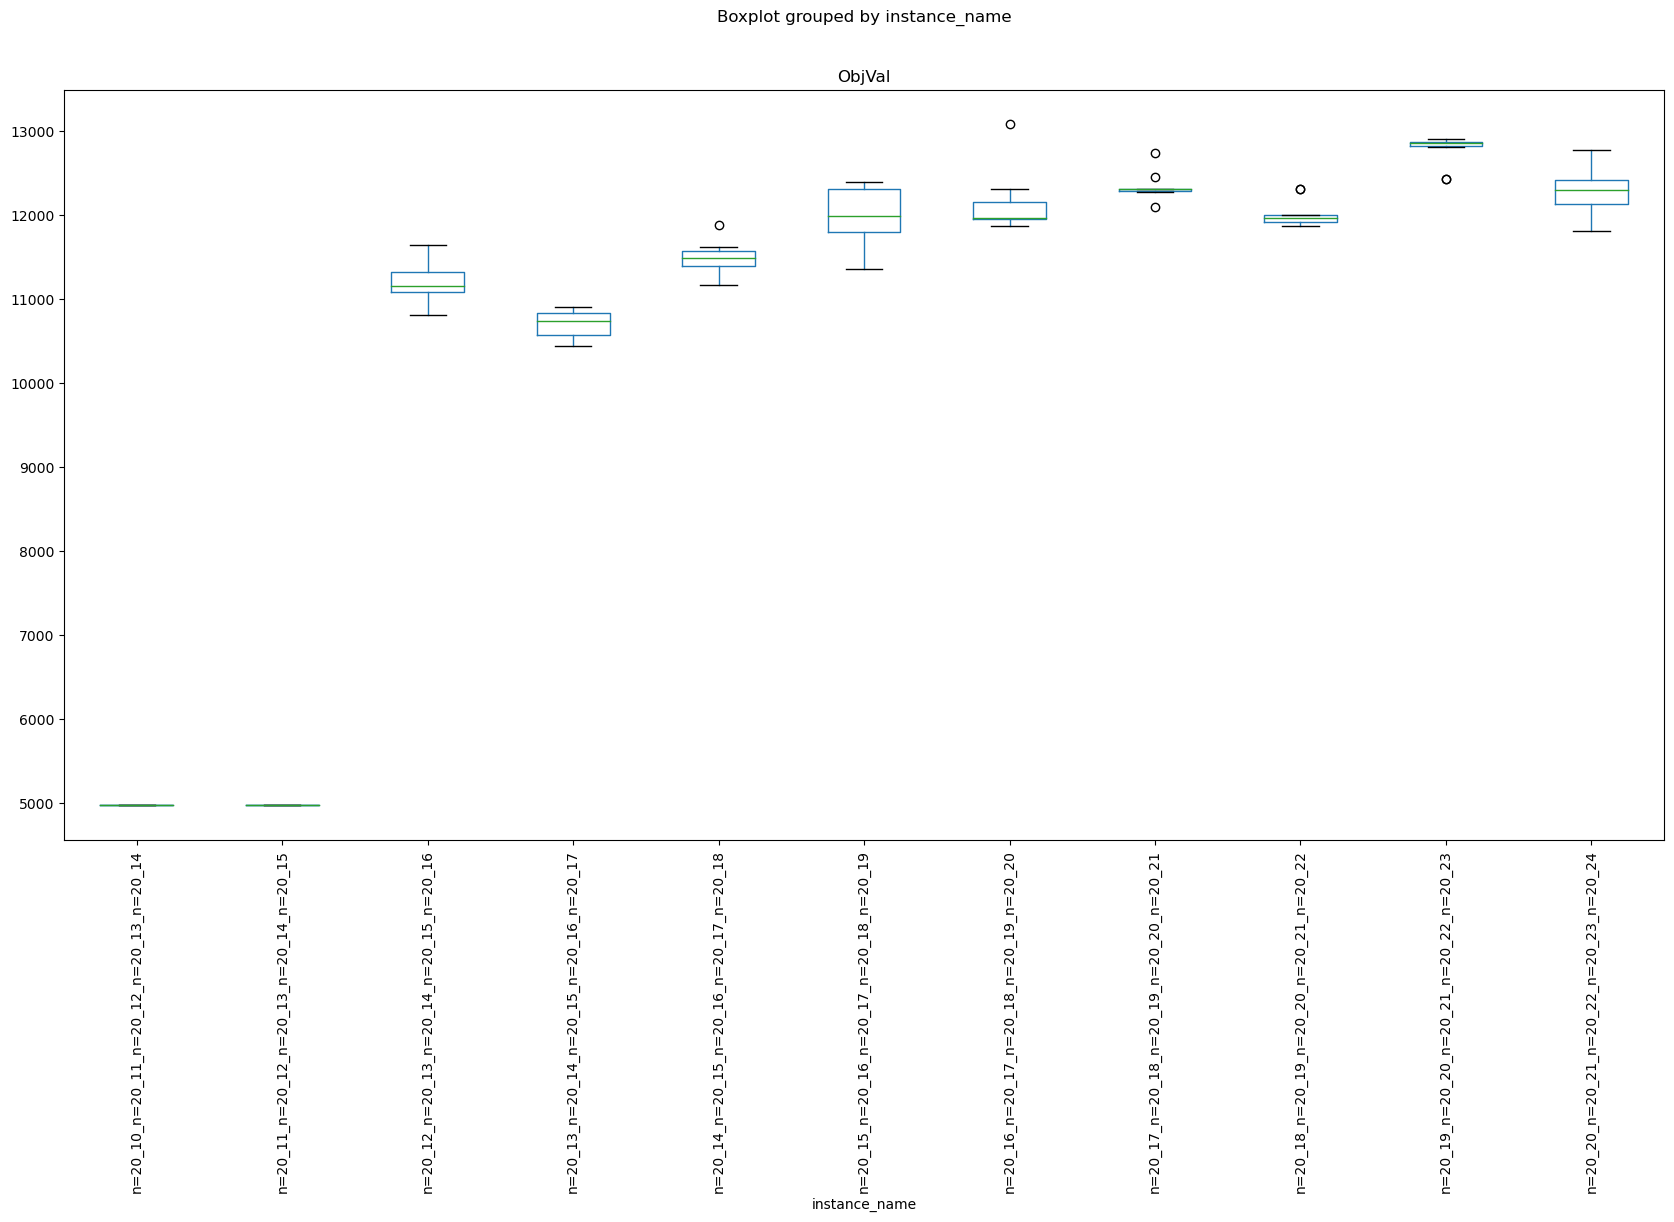

In [7]:
def log_to_summary(log_file_location, csv_config_file):
    log_files = get_log(log_file_location)
    summary = summarize_logs(log_files, csv_config_file)
    return summary
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_12mc_test_20samples"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/no_tree.csv"
summary_20_samples = log_to_summary(log_file_location, csv_config_file)
summary_20_samples['no_samples'] = 20
summary_20_samples.boxplot(column=['ObjVal'], by='instance_name', grid=False, rot=90, fontsize=10, figsize=(20,10))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12_n=20_13_n=20_14'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13_n=20_14_n=20_15'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14_n=20_15_n=20_16'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15_n=20_16_n=20_17'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16_n=20_17_n=20_18'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17_n=20_18_n=20_19'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18_n=20_19_n=20_20'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19_n=20_20_n=20_21'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20_n=20_21_n=20_22'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21_n=20_22_n=20_23'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22_n=20_23_n=20_24')])

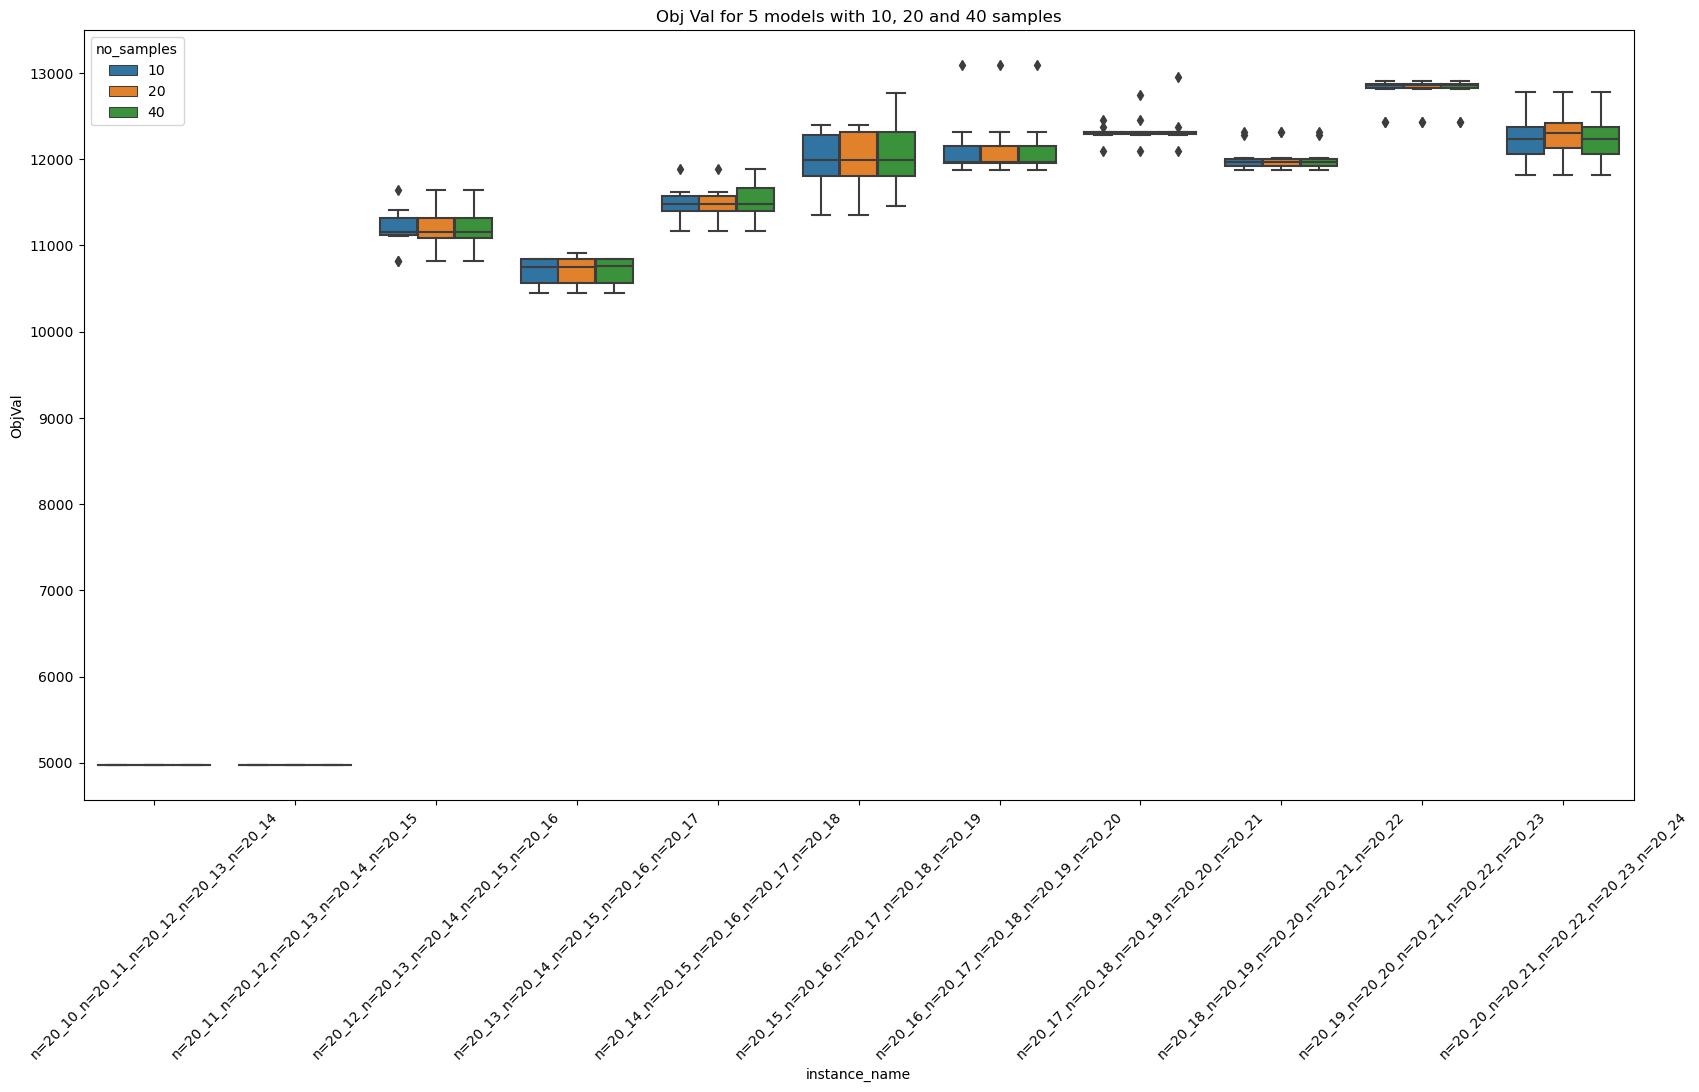

In [8]:
#combines the summary tables of the different sample sizes
summary = pd.concat([summary_10_samples, summary_20_samples, summary_40_samples])
#groups by the number of samples, calculates the mean and standard deviation of the ObjVal and MIPGap
summary_stats = summary.groupby('no_samples').agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary, ax=ax )
plt.title("Obj Val for 5 models with 10, 20 and 40 samples")
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12_n=20_13_n=20_14'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13_n=20_14_n=20_15'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14_n=20_15_n=20_16'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15_n=20_16_n=20_17'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16_n=20_17_n=20_18'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17_n=20_18_n=20_19'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18_n=20_19_n=20_20'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19_n=20_20_n=20_21'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20_n=20_21_n=20_22'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21_n=20_22_n=20_23'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22_n=20_23_n=20_24')])

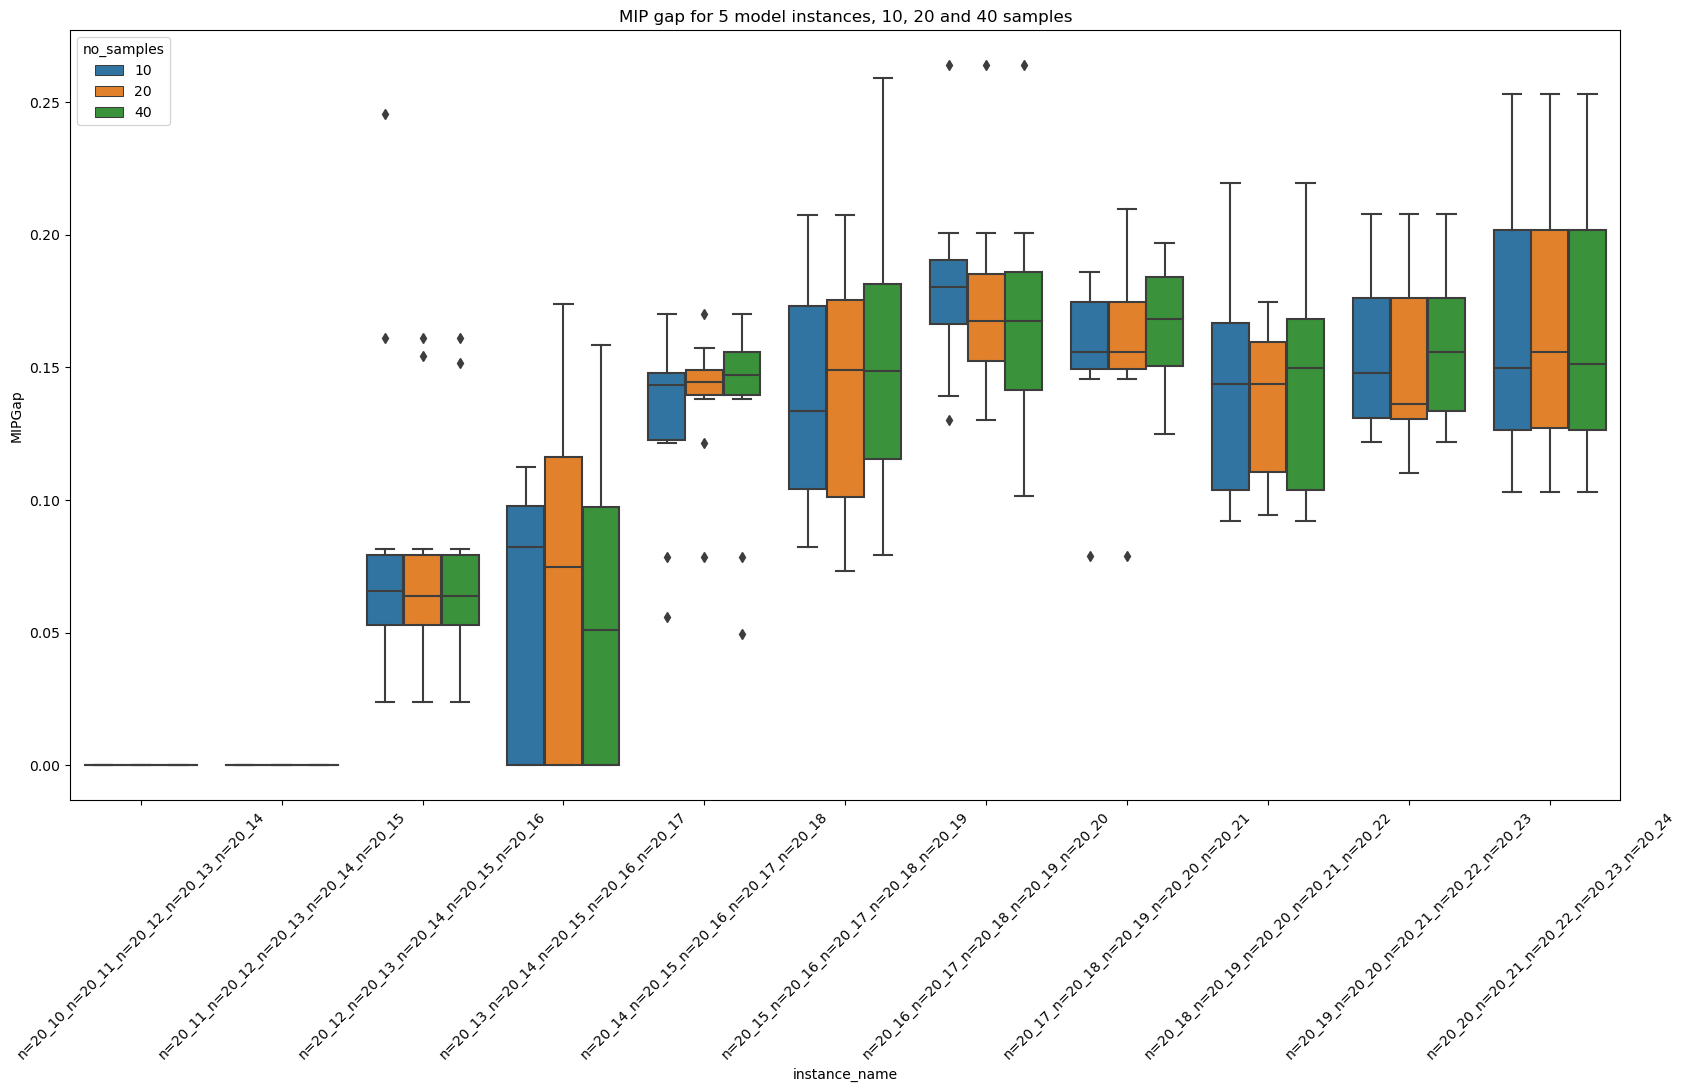

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='instance_name', y='MIPGap', hue='no_samples', data=summary, ax=ax )
#labels the plot "MIP gap for 5 model instances, 10, 20 and 40 samples"
plt.title("MIP gap for 5 model instances, 10, 20 and 40 samples")
plt.xticks(rotation=45)

no_samples       ObjVal                 MIPGap          
                     mean          std      mean       std
0         10  9254.309090  3292.261715  0.074949  0.083691
1         20  9289.568806  3275.260052  0.076671  0.083908
2         40  9293.018348  3280.777558  0.077054  0.083431

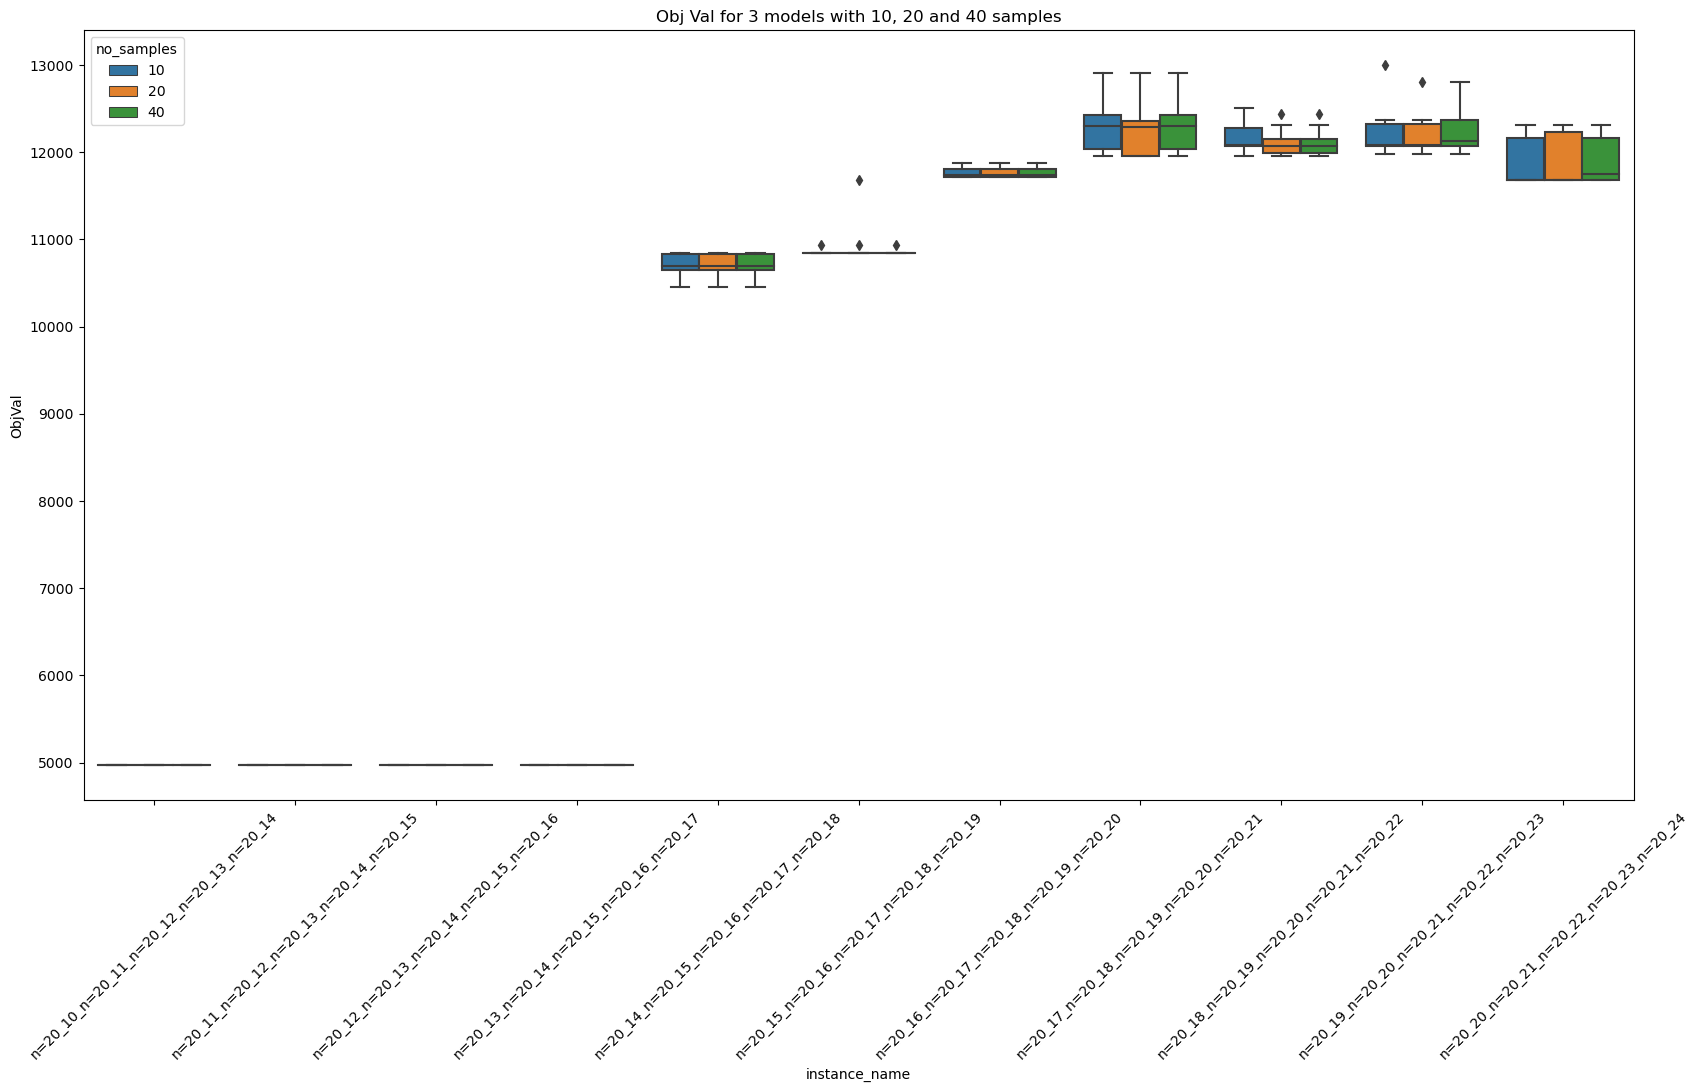

In [10]:

summary_10samp_3_models = log_to_summary("/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_12mc_test_10samples_3instances", "../SALBP_benchmark/MM_instances/csv_config/no_tree.csv")
summary_10samp_3_models['no_samples'] = 10
summary_20samp_3_models = log_to_summary("/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_12mc_test_20samples_3instances", "../SALBP_benchmark/MM_instances/csv_config/no_tree.csv")
summary_20samp_3_models['no_samples'] = 20
summary_40samp_3_models = log_to_summary("/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_12mc_test_40samples_3instances", "../SALBP_benchmark/MM_instances/csv_config/no_tree.csv")
summary_40samp_3_models['no_samples'] = 40
summary_3_models = pd.concat([summary_10samp_3_models, summary_20samp_3_models, summary_40samp_3_models])
summary_3_models.head(10)
#groups by number of samples and instance name, calculates the mean and standard deviation of the ObjVal and MIPGap
#each row has the mean and standard deviation of the ObjVal and MIPGap for each instance, for each number of samples
#there is a column for the mean and standard deviation of the ObjVal and MIPGap for each number of samples
# summary_3_models = summary_3_models.groupby(['no_samples', 'instance_name'], as_index=False).agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
# #puts the mean and standard deviation of the ObjVal and MIPGap for each number of samples in the same row
# summary_3_models = summary_3_models.pivot(index='instance_name', columns='no_samples')
#makes a boxplot of the ObjVal and MIPGap for each instance, for each number of samples there is a different color for each number of samples

#summary_3_models.boxplot(column=['ObjVal'], by=['instance_name', 'no_samples'], grid=False, rot=90, fontsize=10, figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary_3_models, ax=ax )
plt.title("Obj Val for 3 models with 10, 20 and 40 samples")
plt.xticks(rotation=45)
summary_3_models_stats = summary_3_models.groupby(['no_samples'], as_index=False).agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
summary_3_models_stats

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12_n=20_13_n=20_14'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13_n=20_14_n=20_15'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14_n=20_15_n=20_16'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15_n=20_16_n=20_17'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16_n=20_17_n=20_18'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17_n=20_18_n=20_19'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18_n=20_19_n=20_20'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19_n=20_20_n=20_21'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20_n=20_21_n=20_22'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21_n=20_22_n=20_23'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22_n=20_23_n=20_24')])

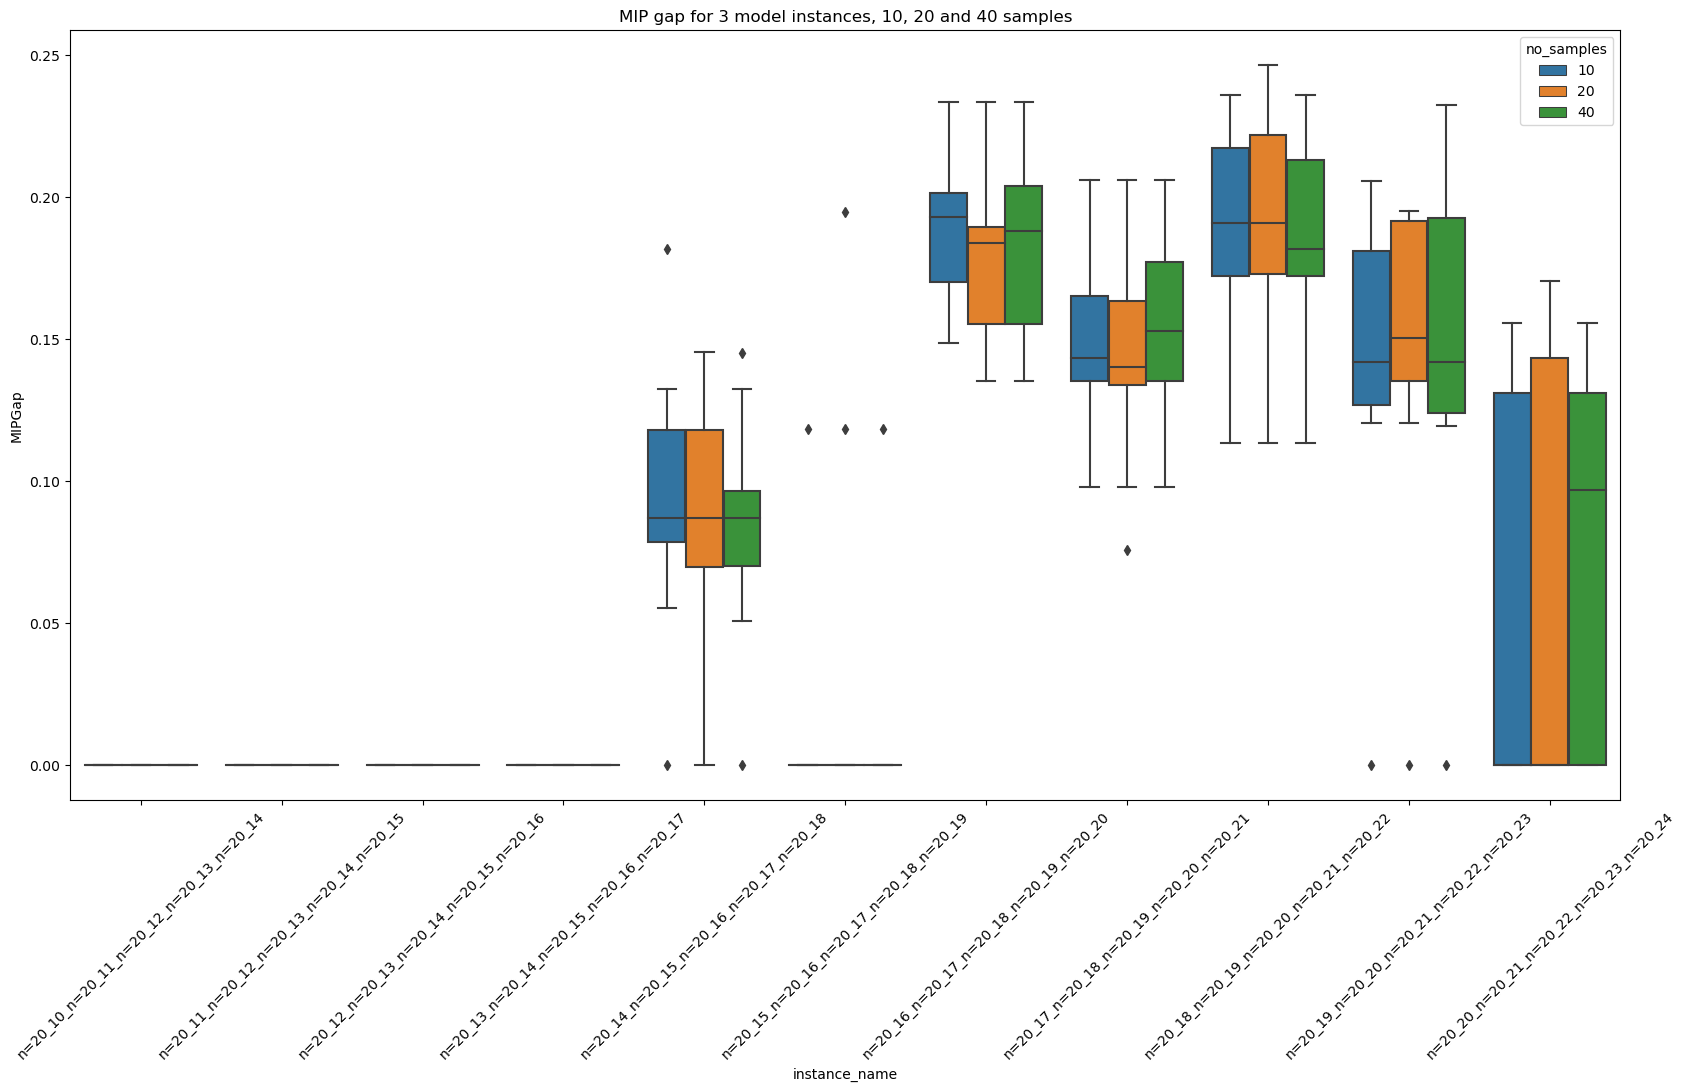

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='instance_name', y='MIPGap', hue='no_samples', data=summary_3_models, ax=ax )
plt.title("MIP gap for 3 model instances, 10, 20 and 40 samples")
plt.xticks(rotation=45)

# second go

In [12]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests2/2024_03_16mc_test_5samples_5models"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/5_models_5_samp_no_tree.csv"
summary_5samp_5_models = log_to_summary(log_file_location, csv_config_file)
summary_5samp_5_models['no_samples'] = 5
summary_5samp_5_models.shape[0]

110

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12_n=20_13_n=20_14'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13_n=20_14_n=20_15'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14_n=20_15_n=20_16'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15_n=20_16_n=20_17'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16_n=20_17_n=20_18'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17_n=20_18_n=20_19'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18_n=20_19_n=20_20'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19_n=20_20_n=20_21'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20_n=20_21_n=20_22'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21_n=20_22_n=20_23'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22_n=20_23_n=20_24')])

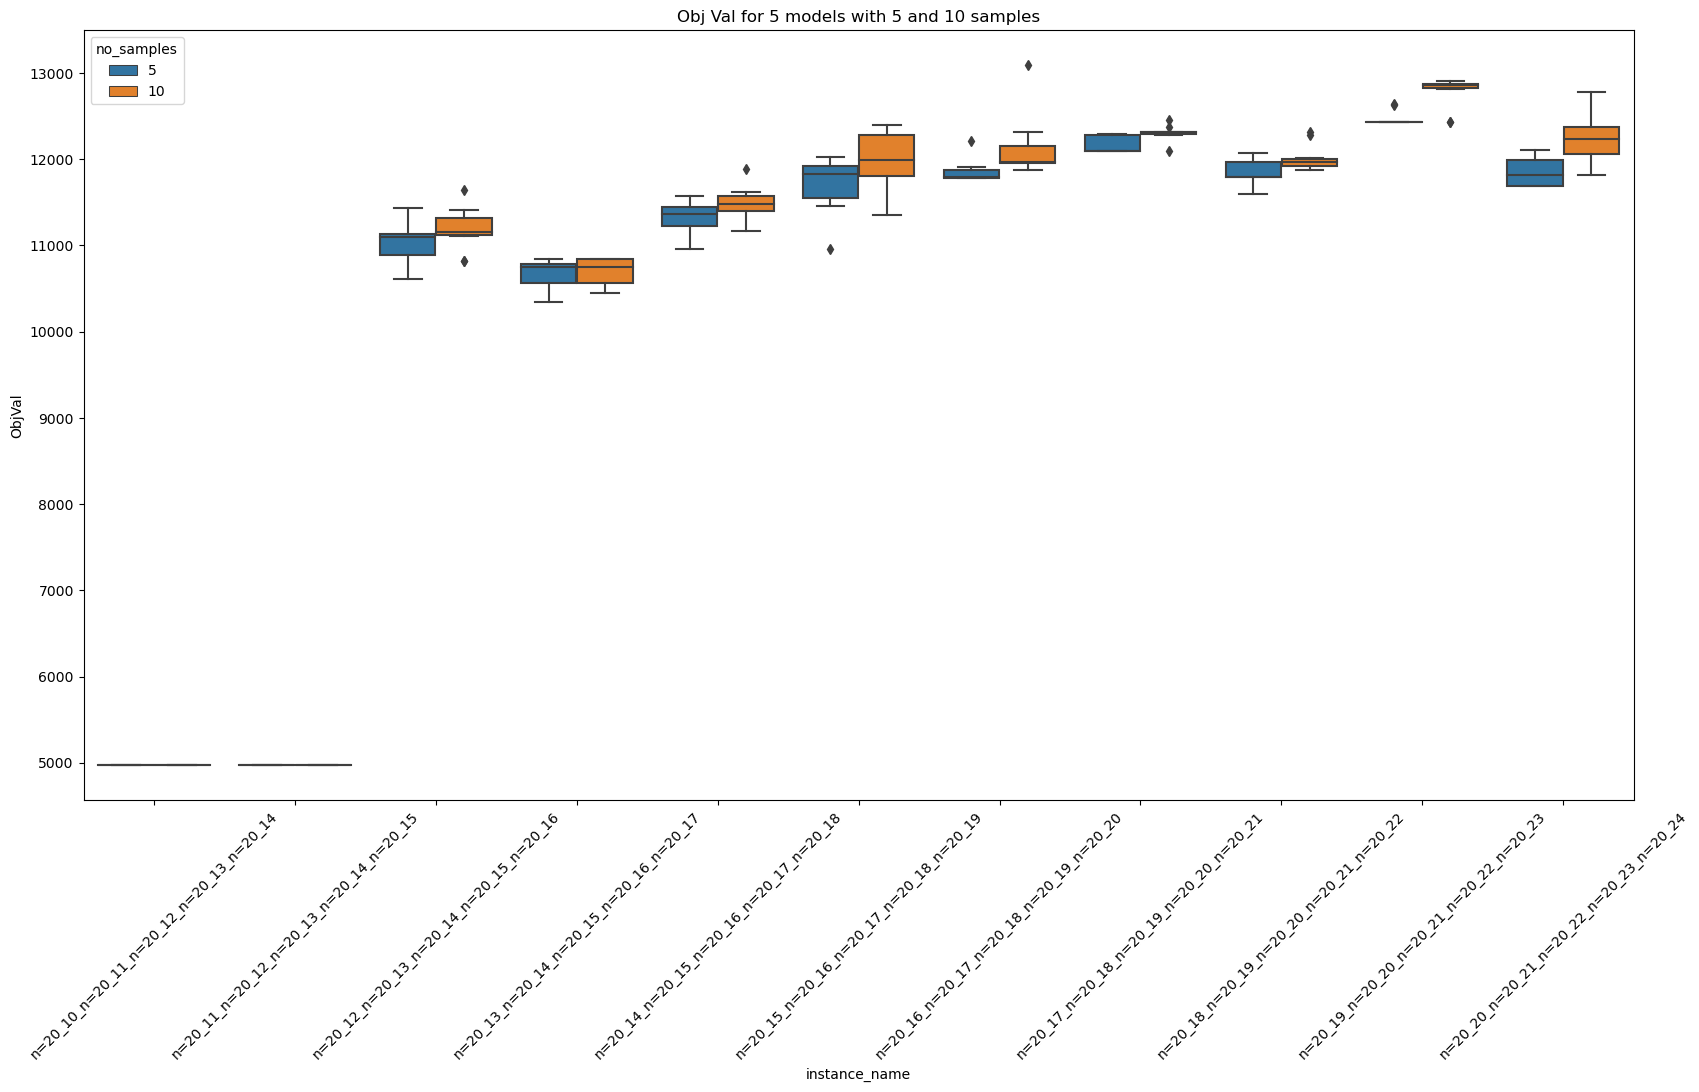

In [13]:
summary = pd.concat([summary_10_samples,summary_5samp_5_models])
#groups by the number of samples, calculates the mean and standard deviation of the ObjVal and MIPGap
summary_stats = summary.groupby('no_samples').agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary, ax=ax )
plt.title("Obj Val for 5 models with 5 and 10 samples")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12_n=20_13_n=20_14'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13_n=20_14_n=20_15'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14_n=20_15_n=20_16'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15_n=20_16_n=20_17'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16_n=20_17_n=20_18'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17_n=20_18_n=20_19'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18_n=20_19_n=20_20'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19_n=20_20_n=20_21'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20_n=20_21_n=20_22'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21_n=20_22_n=20_23'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22_n=20_23_n=20_24')])

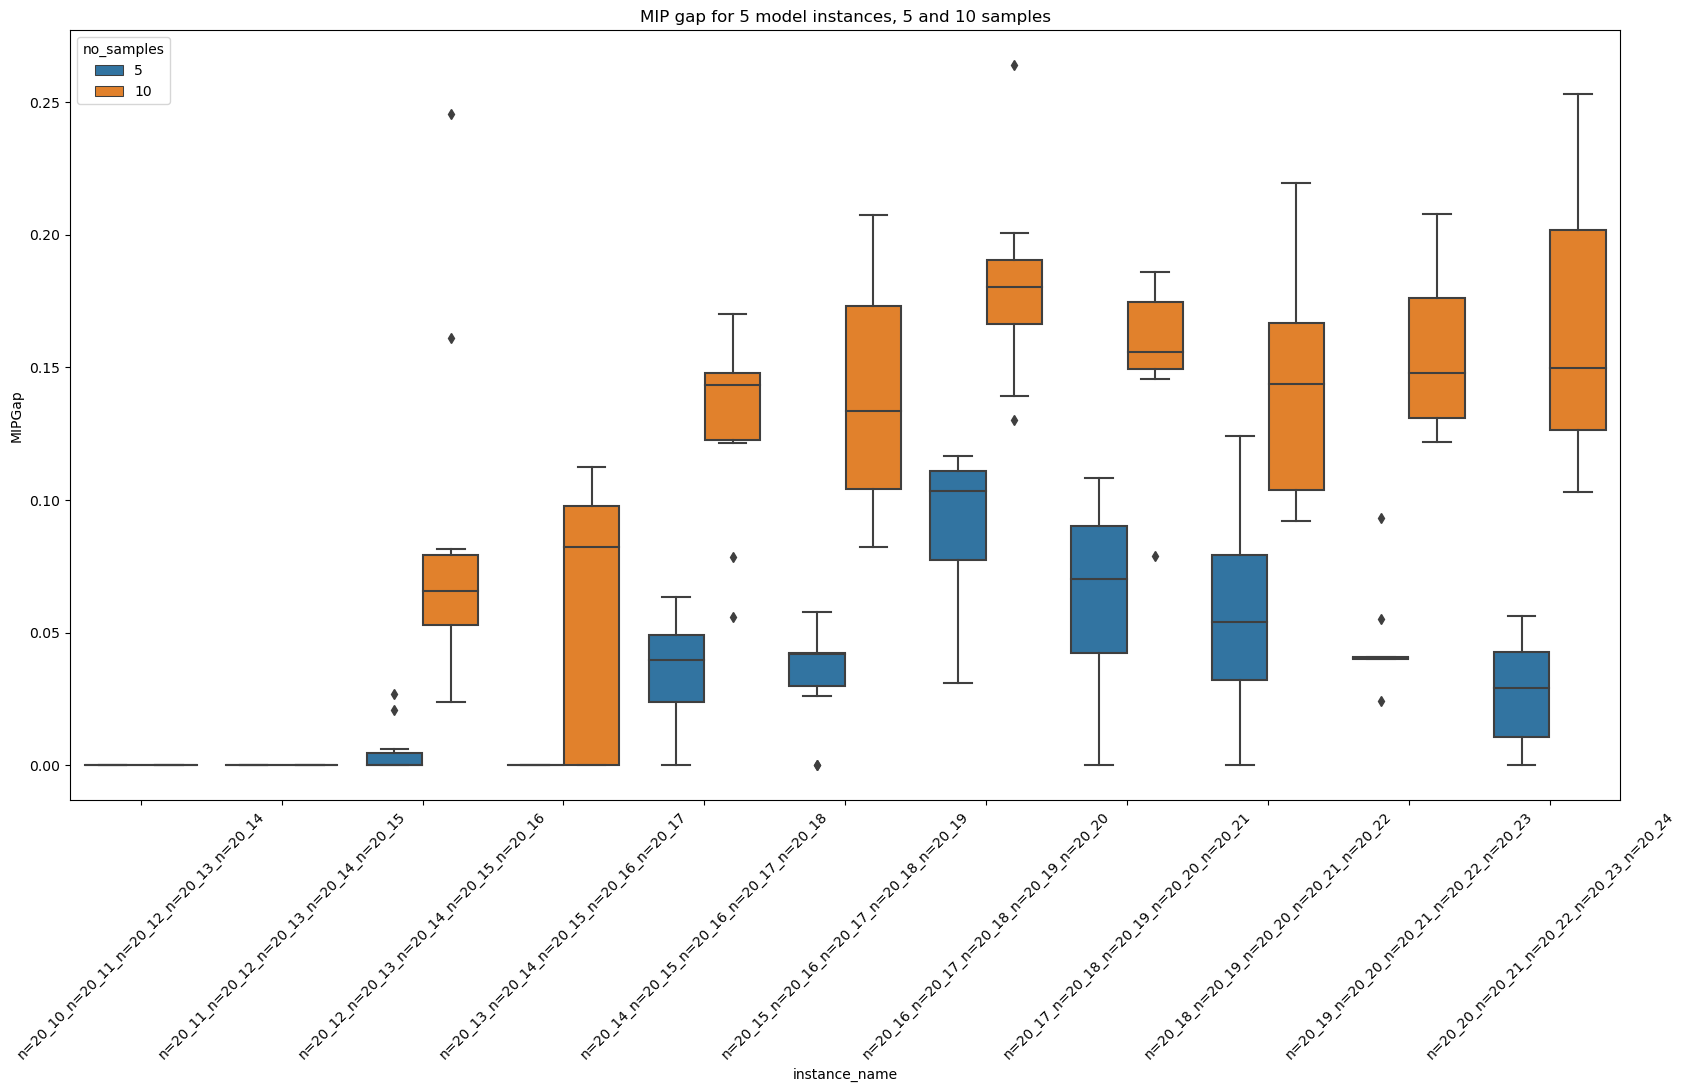

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='instance_name', y='MIPGap', hue='no_samples', data=summary, ax=ax )
#labels the plot "MIP gap for 5 model instances, 10, 20 and 40 samples"
plt.title("MIP gap for 5 model instances, 5 and 10 samples")
plt.xticks(rotation=45)

In [15]:
summary_stats

ObjVal                 MIPGap          
                    mean          std      mean       std
no_samples                                               
5           10443.654545  2640.735366  0.032837  0.035661
10          10616.472725  2735.735537  0.109796  0.072709

In [16]:
# summary = pd.concat([summary_10_samples, summary_5samp_5_models, summary_40_samples])
# #groups by the number of samples, calculates the mean and standard deviation of the ObjVal and MIPGap
# summary_stats = summary.groupby('no_samples').agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
# fig, ax = plt.subplots(figsize=(20,10))
# sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary, ax=ax )
# plt.title("Obj Val for 5 models with 10, 20 and 40 samples")
# plt.xticks(rotation=45)


## 3 models

In [17]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests2/2024_03_15mc_test_5samples_3instances"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/3_instances.csv"
summary_5samp_3_models = log_to_summary(log_file_location, csv_config_file)
summary_5samp_3_models['no_samples'] = 5
summary_5samp_3_models.shape[0]

111

In [18]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests2/2024_03_15mc_test_20samples_3models"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/3_instances.csv"
summary_20samp_3_models = log_to_summary(log_file_location, csv_config_file)
summary_20samp_3_models['no_samples'] = 20
summary_20samp_3_models.shape[0]

110

In [19]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests/2024_03_12mc_test_10samples_3instances"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/3_instances.csv"
summary_10samp_3_models = log_to_summary(log_file_location, csv_config_file)
summary_10samp_3_models['no_samples'] = 10
summary_10samp_3_models.shape[0]

110

In [20]:
summary_3_models = pd.concat([summary_10samp_3_models, summary_5samp_3_models, summary_20samp_3_models ])
summary_3_models_stats = summary_3_models.groupby(['no_samples'], as_index=False).agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
summary_3_models_stats

no_samples        ObjVal                 MIPGap          
                      mean          std      mean       std
0          5   9116.045045  3221.141764  0.029634  0.045546
1         10   9254.309090  3292.261715  0.074949  0.083691
2         20  10996.572727  2948.899942  0.196611  0.100124

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22')])

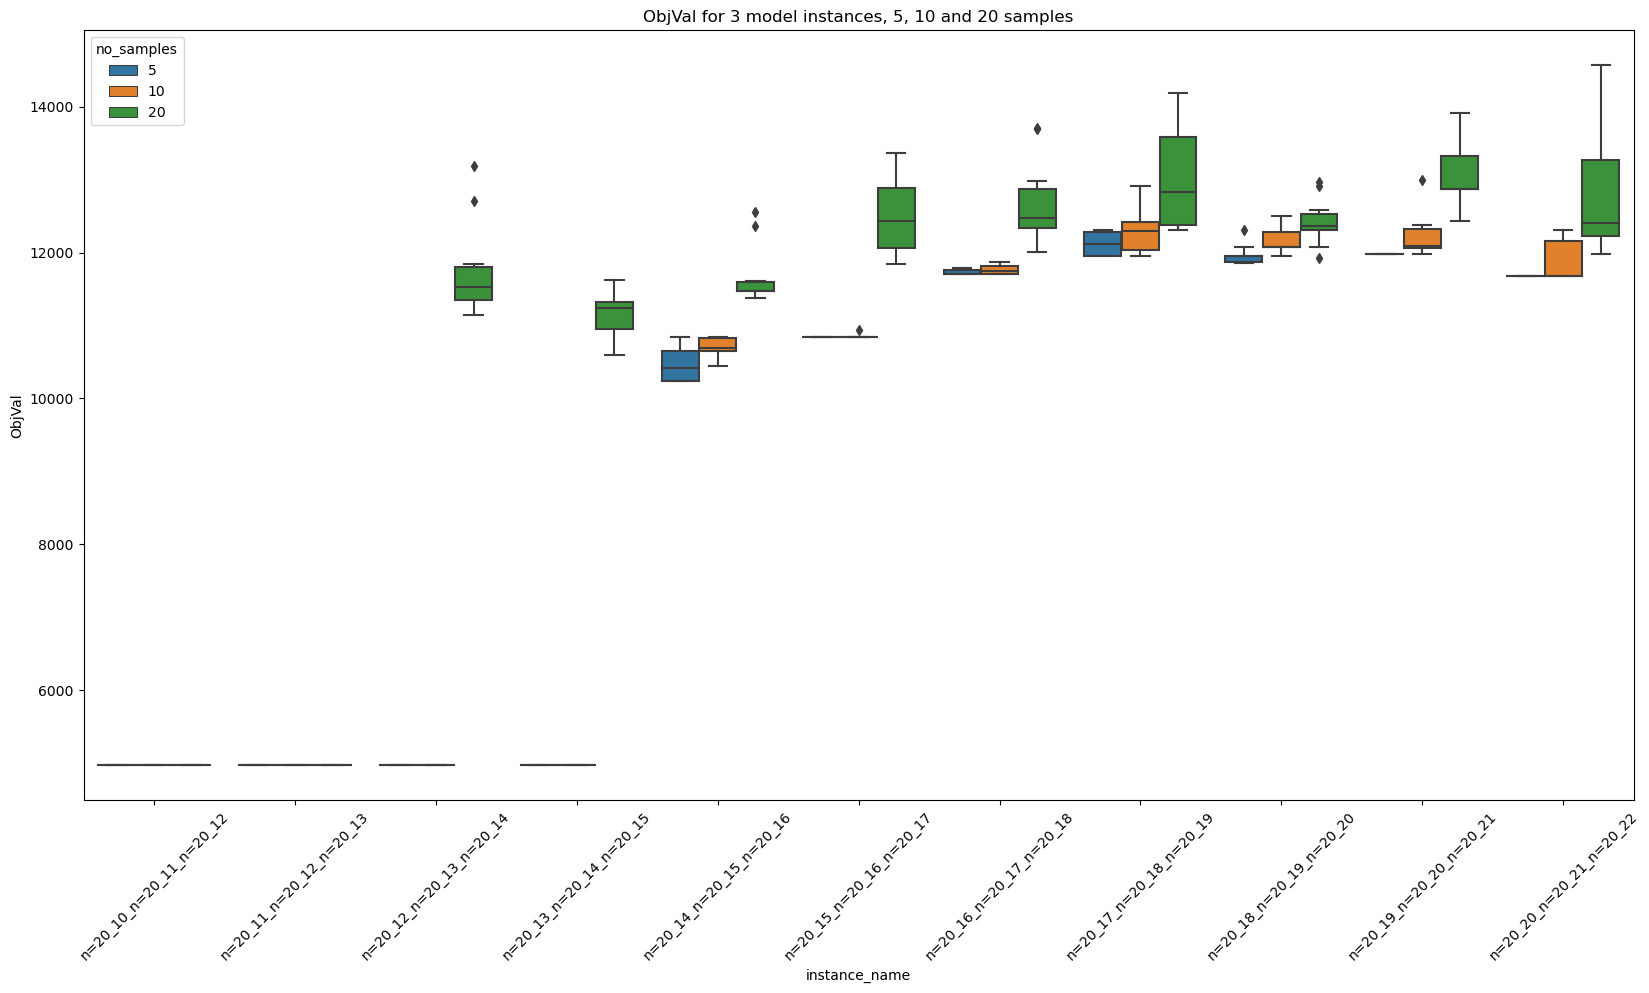

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary_3_models, ax=ax )
#labels the plot "MIP gap for 5 model instances, 10, 20 and 40 samples"
plt.title("ObjVal for 3 model instances, 5, 10 and 20 samples")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22')])

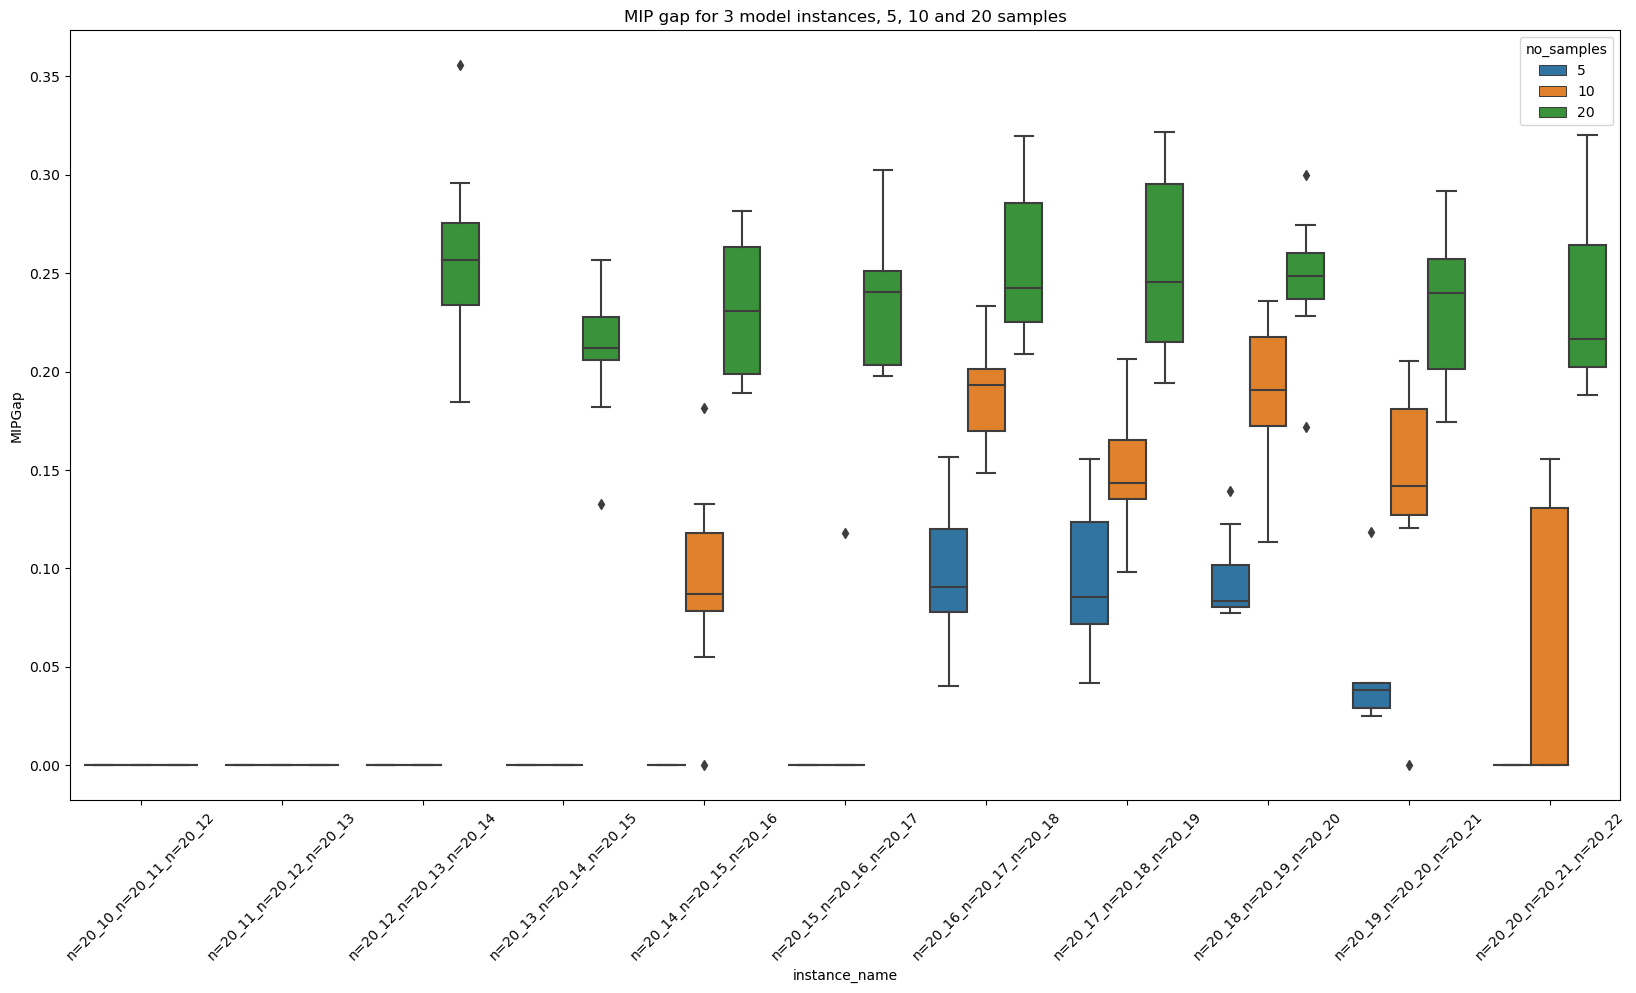

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='instance_name', y='MIPGap', hue='no_samples', data=summary_3_models, ax=ax )
#labels the plot "MIP gap for 5 model instances, 10, 20 and 40 samples"
plt.title("MIP gap for 3 model instances, 5, 10 and 20 samples")
plt.xticks(rotation=45)

## 5 hour tests samplings of a sequence of 20

In [41]:
#log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_tests2/2024_03_15mc_test_5samples_3instances_2_hours"
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_test_march27/2024_03_26mc_test_5samples_3instances_8_hours"


csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/5_samp_no_tree.csv"
summary_5samp_3_models_8_hours = log_to_summary(log_file_location, csv_config_file)
summary_5samp_3_models_8_hours['no_samples'] = 5
summary_5samp_3_models_8_hours.shape[0]

110

In [42]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_test_march27/2024_03_26mc_test_10samples_3instances_8_hours"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/3_instances.csv"
summary_10samp_3_models_8_hours = log_to_summary(log_file_location, csv_config_file)
summary_10samp_3_models_8_hours['no_samples'] = 10
summary_10samp_3_models_8_hours.shape[0]

110

In [45]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_test_march27/2024_03_26mc_test_20samples_3instances_8_hours"
csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/20_samp_no_tree.csv"
summary_20samp_3_models_2_hours = log_to_summary(log_file_location, csv_config_file)
summary_20samp_3_models_2_hours['no_samples'] = 20
summary_20samp_3_models_2_hours.shape[0]

110

In [46]:
summary_3_models_8_hours = pd.concat([summary_5samp_3_models_8_hours, summary_10samp_3_models_8_hours, summary_20samp_3_models_2_hours ])
summary_3_models_8_hours['MIPGap'] = summary_3_models_8_hours['MIPGap'] * 100
summary_3_models_8_hours_stats = summary_3_models_8_hours.groupby(['no_samples'], as_index=False).agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
summary_3_models_8_hours_stats

no_samples       ObjVal                 MIPGap          
                     mean          std      mean       std
0          5  9131.027273  3190.238317  1.186229  1.901750
1         10  9155.581818  3202.433998  1.581061  2.318335
2         20  9175.718182  3220.149891  2.484215  3.653997

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22')])

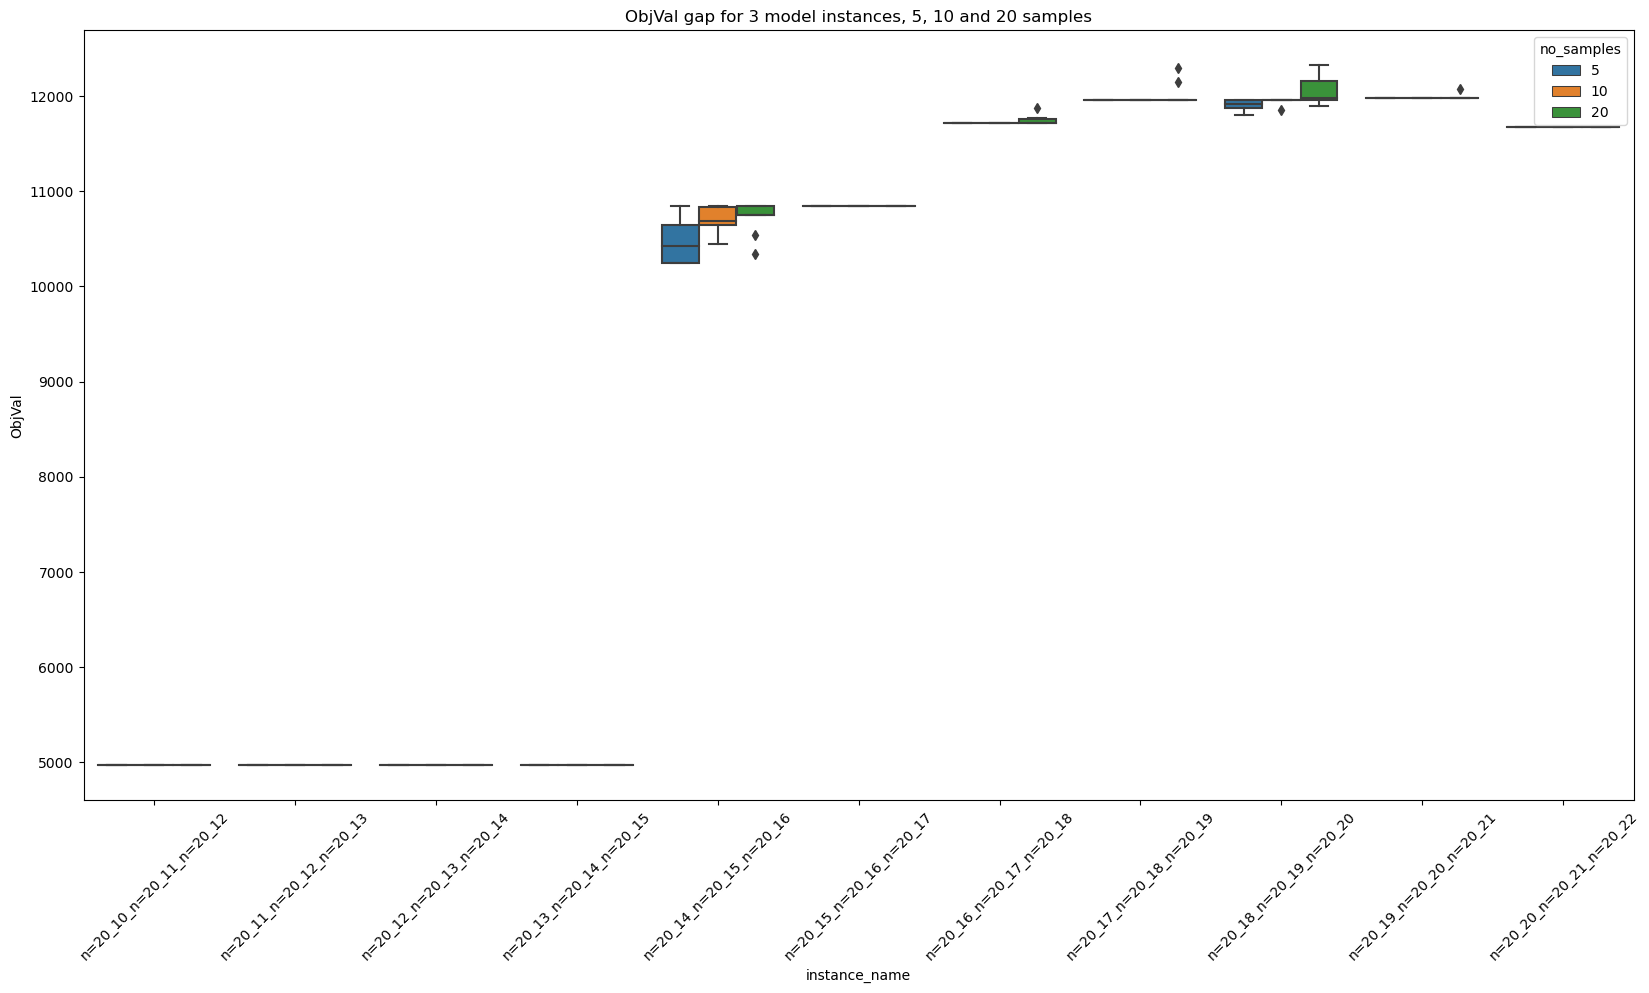

In [47]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary_3_models_8_hours, ax=ax )
#labels the plot "MIP gap for 5 model instances, 10, 20 and 40 samples"
plt.title("ObjVal gap for 3 model instances, 5, 10 and 20 samples")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'n=20_10_n=20_11_n=20_12'),
  Text(1, 0, 'n=20_11_n=20_12_n=20_13'),
  Text(2, 0, 'n=20_12_n=20_13_n=20_14'),
  Text(3, 0, 'n=20_13_n=20_14_n=20_15'),
  Text(4, 0, 'n=20_14_n=20_15_n=20_16'),
  Text(5, 0, 'n=20_15_n=20_16_n=20_17'),
  Text(6, 0, 'n=20_16_n=20_17_n=20_18'),
  Text(7, 0, 'n=20_17_n=20_18_n=20_19'),
  Text(8, 0, 'n=20_18_n=20_19_n=20_20'),
  Text(9, 0, 'n=20_19_n=20_20_n=20_21'),
  Text(10, 0, 'n=20_20_n=20_21_n=20_22')])

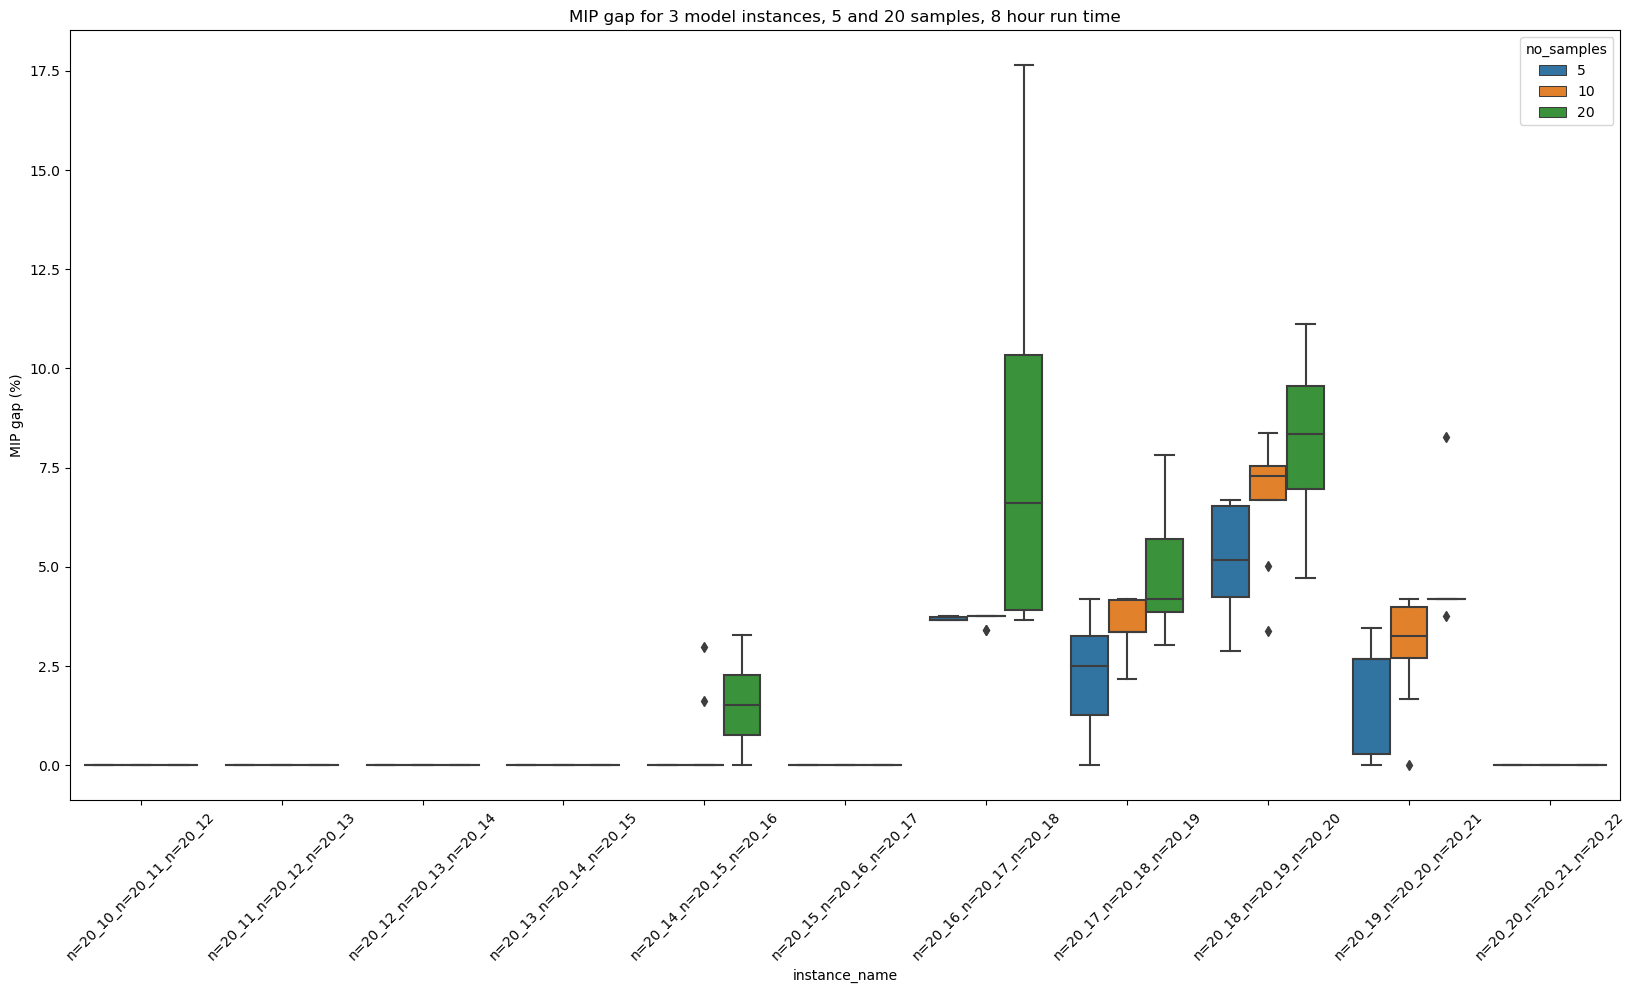

In [50]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='instance_name', y='MIPGap', hue='no_samples', data=summary_3_models_8_hours, ax=ax )
#labels the plot "MIP gap for 5 model instances, 10, 20 and 40 samples"
plt.title("MIP gap for 3 model instances, 5 and 20 samples, 8 hour run time")
#Labels the y axis as MIP gap in percentage
plt.ylabel("MIP gap (%)")
plt.xticks(rotation=45)

## Small tree tests

In [52]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_test_march27/2024_03_22small_tree_samp_5"


csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/seq5_o20_samp_5.csv"
summary_5samp_3_models_full_tree = log_to_summary(log_file_location, csv_config_file)
summary_5samp_3_models_full_tree['no_samples'] = 5
summary_5samp_3_models_full_tree.shape[0]

230

In [53]:
log_file_location = "/Users/letshopethisworks2/Documents/Phd Paper material/model_runs/mc_test_march27/2024_03_22small_tree_samp_20"


csv_config_file = "../SALBP_benchmark/MM_instances/csv_config/seq5_o20_samp_20.csv"
summary_20samp_3_models_full_tree = log_to_summary(log_file_location, csv_config_file)
summary_20samp_3_models_full_tree['no_samples'] = 20
summary_20samp_3_models_full_tree.shape[0]

230

In [54]:

def concat_and_summarize(df_list):
    summary = pd.concat(df_list)
    summary['MIPGap'] = summary['MIPGap'] * 100
    summary_stats = summary.groupby(['no_samples'], as_index=False).agg({'ObjVal': ['mean', 'std'], 'MIPGap': ['mean', 'std']})
    return summary, summary_stats
st_sum, st_stats = concat_and_summarize([summary_5samp_3_models_full_tree, summary_20samp_3_models_full_tree])

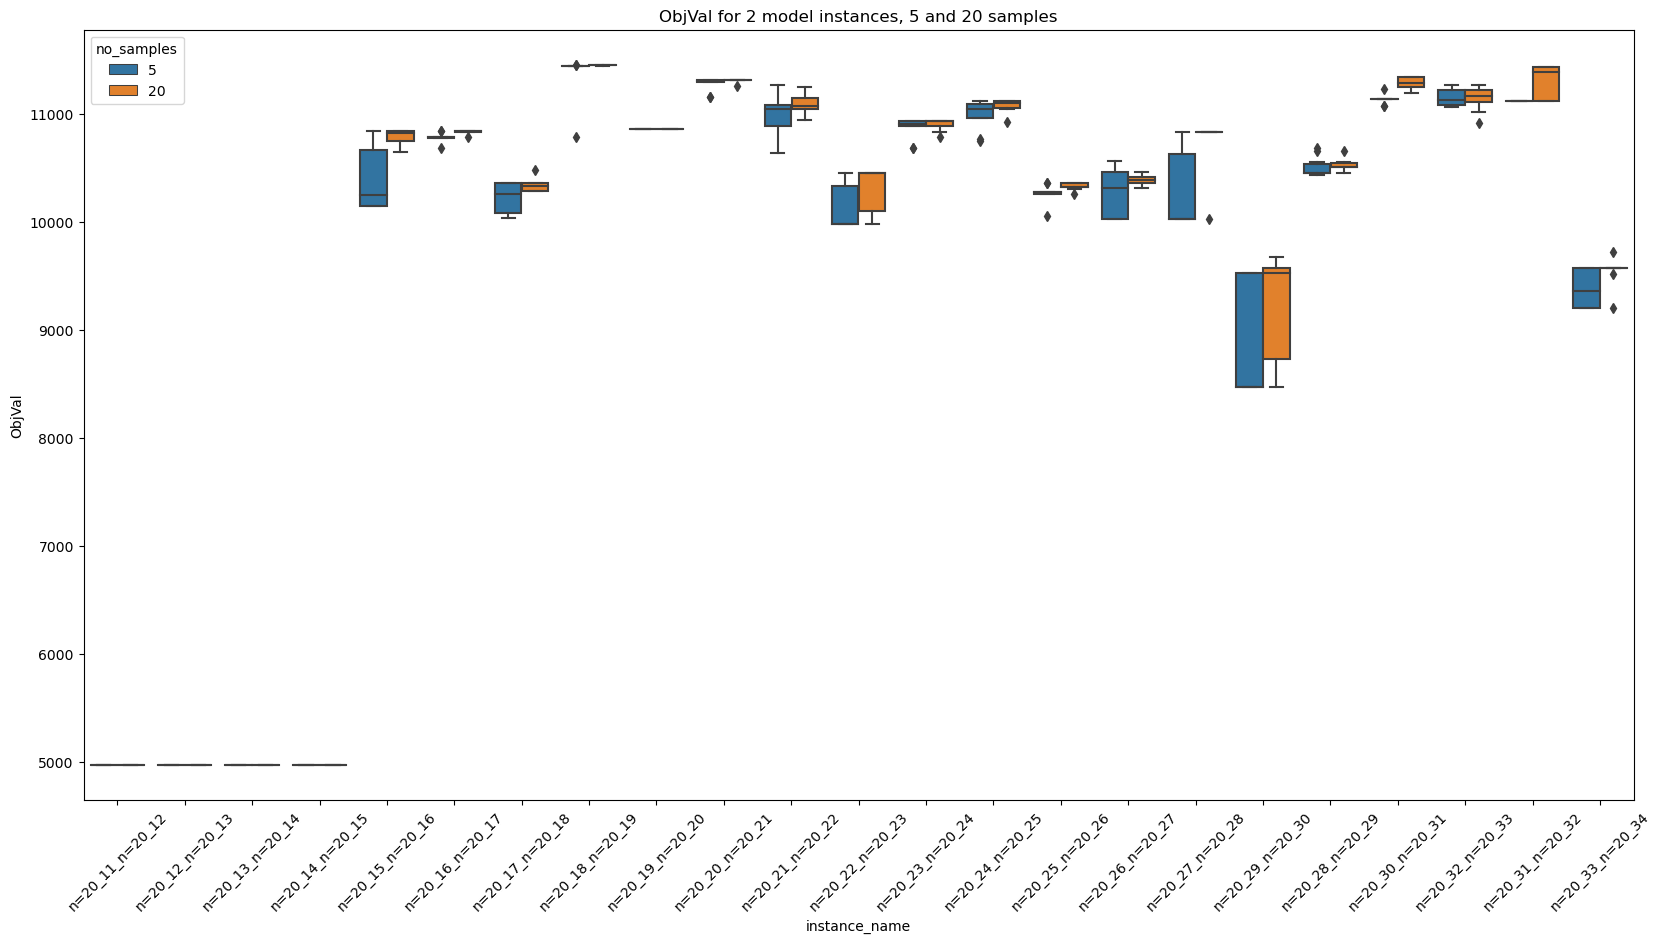

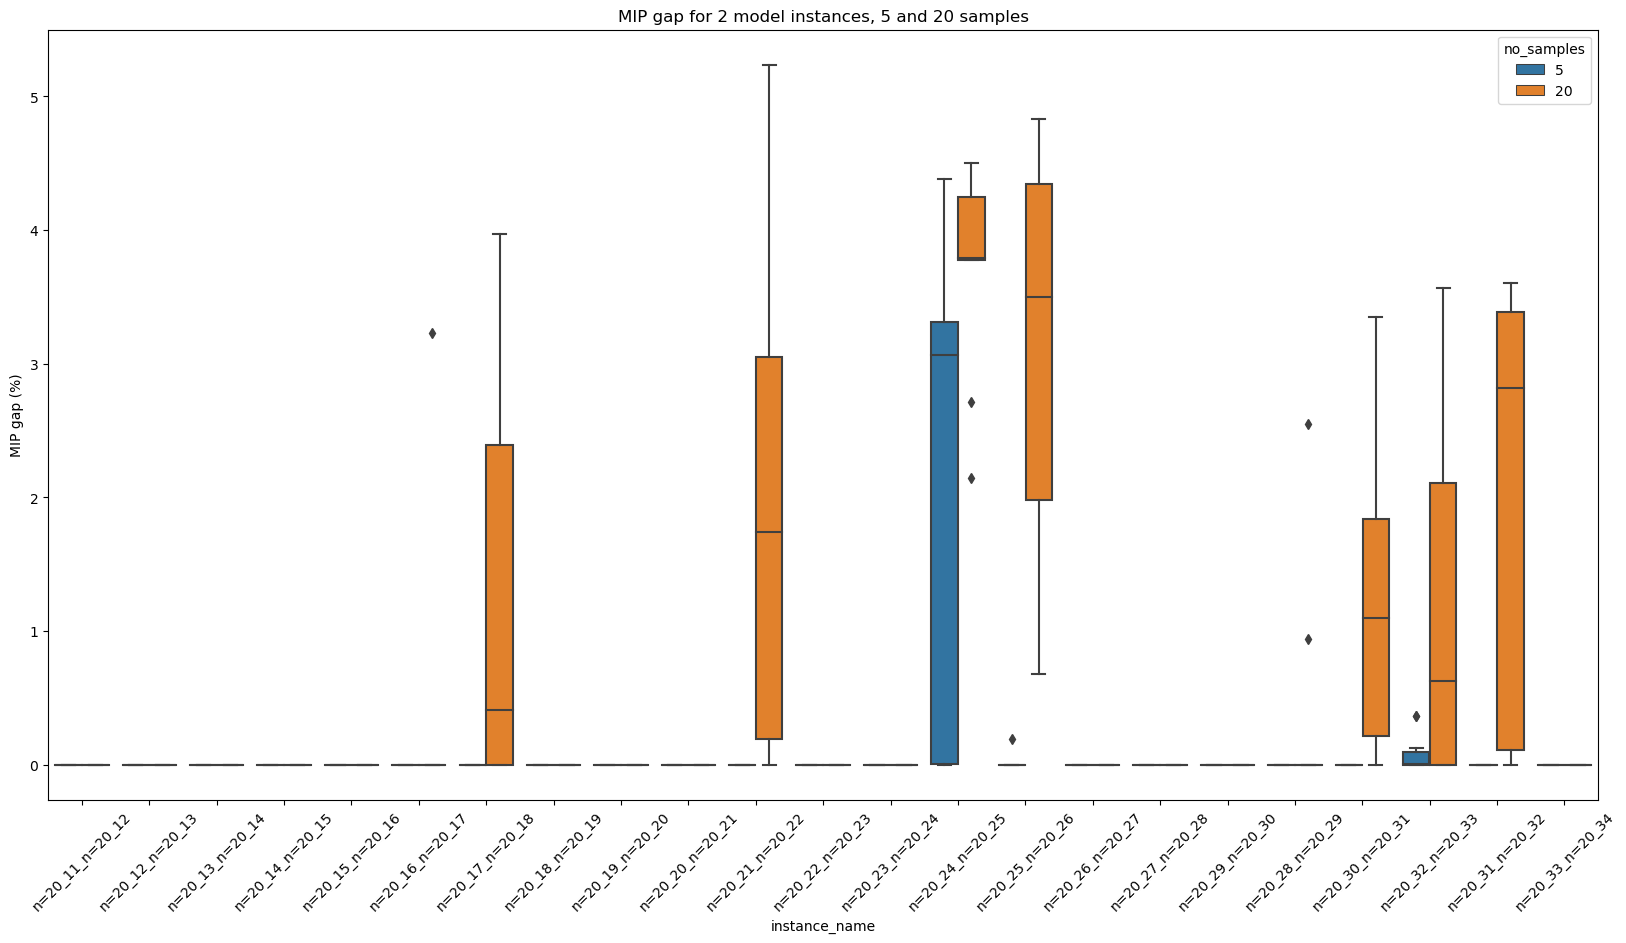

In [56]:
def plot_obj_value(summary, title):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x='instance_name', y='ObjVal', hue='no_samples', data=summary, ax=ax )
    plt.title(title)
    plt.xticks(rotation=45)

def plot_mip_gap(summary, title):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x='instance_name', y='MIPGap', hue='no_samples', data=summary, ax=ax )
    plt.title(title)
    plt.ylabel("MIP gap (%)")
    plt.xticks(rotation=45)
plot_obj_value(st_sum, "ObjVal for 2 model instances, 5 and 20 samples")
plot_mip_gap(st_sum, "MIP gap for 2 model instances, 5 and 20 samples")